# Session 7 - Neural Networks for Cifar-10 data

In this notebook, we're going to see how we can train simple neural networks using ```TensorFlow```, a machine learning and deep learning framework developed by Google Research. You can find the documentation [here](https://www.tensorflow.org/).

We're still working on greyscale images at this point - next week, we'll start thinking about working with full colour images.

In [1]:
# path tools
import os
import cv2

# tools from sklearn
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# data loader
import numpy as np
from tensorflow.keras.datasets import cifar10

# matplotlib
import matplotlib.pyplot as plt

2023-03-17 14:53:52.156503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Download data, train-test split

Downloading the ```Cifar_10``` dataset and preprocessing it.

In [2]:
#fetch the data and get the data and the labels

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = ["airplane", 
          "automobile", 
          "bird", 
          "cat", 
          "deer", 
          "dog", 
          "frog", 
          "horse", 
          "ship", 
          "truck"]

# turn images into greyscale using list comprehensions. 
X_train_grey = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test_grey = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

# Scaling images
X_train_scaled = (X_train_grey)/255.0
X_test_scaled = (X_test_grey)/255.0

# reshaping images in training data
nsamples, nx, ny = X_train_scaled.shape
X_train_dataset = X_train_scaled.reshape((nsamples,nx*ny)) 
#reshaping images in test data
nsamples, nx, ny = X_test_scaled.shape
X_test_dataset = X_test_scaled.reshape((nsamples,nx*ny))

In [3]:
X_test_dataset.shape 


(10000, 1024)

In [4]:
# label binarizing = convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

## Define neural network architecture using ```tf.keras```

We're now going to create our neural network using ```TensorFlow```. In particular, we're going to using the ```keras``` wrapper which makes the syntax a bit simpler to work with.

In [5]:
# Creating the model
model = Sequential() # sequential means that it is feed forward
model.add(Dense(256, 
                input_shape=(1024,), #the input is the total number of pixel (32x32) in each image
                activation="relu")) # the activation function is "relu". You could also use "sigmoid".
model.add(Dense(128, 
                activation="relu"))
model.add(Dense(10, 
                activation="softmax"))  

2023-03-17 14:54:38.246472: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Show summary of model architecture

In [6]:
# Tool to see, if what we are doing are actually what we want
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 296,586
Trainable params: 296,586
Non-trainable params: 0
_________________________________________________________________


## Compile model loss function, optimizer, and preferred metrics

One of the big differences with ```TensorFlow``` vs ```scikit-learn``` is that we have much more control over how the optimization algorithm works.

We initalize the optimizer and then we have to *compile* the model.

In [7]:
# train model using SGD
sgd = SGD(0.01)  
# Compiling the model (so it gest more efficient)
model.compile(loss="categorical_crossentropy",
              optimizer=sgd, 
              metrics=["accuracy"]) 

## Train model and save history

Once we've done that, it's just a case of fitting the model to the data.

In [8]:
history = model.fit(X_train_dataset, y_train, 
                    epochs=10, 
                    batch_size=32) # the weights are only updated after the model has looked at 32 images.

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0524 - accuracy: 0.2574
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9193 - accuracy: 0.3214
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8507 - accuracy: 0.3447
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8029 - accuracy: 0.3635
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7652 - accuracy: 0.3769
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7341 - accuracy: 0.3893
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7072 - accuracy: 0.3991
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6819 - accuracy: 0.4081
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6602 - accuracy: 0.4150
Epoch 10/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6

## Visualise using ```matplotlib```

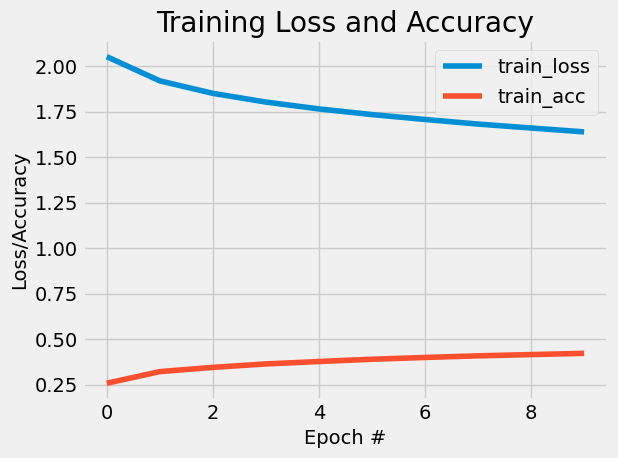

In [9]:
plt.style.use("fivethirtyeight") # just the style of the visualization
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

## Classifier metrics

We need to do a little bit of extra work to get the classification report to work properly.

In [11]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(X_test_dataset, batch_size=32)

[INFO] evaluating network...
313/313 [==============================] - 1s 4ms/step


In [12]:
y_test[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [13]:
print(classification_report(y_test.argmax(axis=1), #compares all of the highest values
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_])) # take the classes and create a list of label names for our class refort to use

              precision    recall  f1-score   support

           0       0.32      0.61      0.42      1000
           1       0.50      0.51      0.50      1000
           2       0.32      0.23      0.27      1000
           3       0.30      0.23      0.26      1000
           4       0.39      0.29      0.33      1000
           5       0.43      0.27      0.34      1000
           6       0.36      0.57      0.44      1000
           7       0.56      0.32      0.41      1000
           8       0.45      0.51      0.48      1000
           9       0.50      0.44      0.47      1000

    accuracy                           0.40     10000
   macro avg       0.41      0.40      0.39     10000
weighted avg       0.41      0.40      0.39     10000



### Task

1. Turn the above into a ```.py``` script which can be run from the command line. Use argparse if you think it's relevant!
2. Use this notebook as a template to train a neural network on the ```Cifar-10``` dataset instead of ```MNIST```.
3. Turn *that* notebook into a ```.py``` script, too